**Author: Alexander Kollmann, 08/2022**

---

**Funktion**

Dataframe als CSV schreiben

CSV als Dataframe lesen

---

**Referenzen**

https://cyublog.com/articles/python-en/colab-pandas-three-ways-to-save-dataframe-data/

https://www.shanelynn.ie/python-pandas-read-csv-load-data-from-csv-files/

https://iq.opengenus.org/google-colab/

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

---



# Schreiben von CSV-Dateien

In [ ]:
from google.colab import files
from google.colab import drive

In [ ]:
import pandas as pd
import requests
from io import StringIO

In [ ]:
# Test Dataframe erstellen mit Zahlen, Text und Umlauten bzw. Sonderzeichen
data = {
  "calories": [1, 2, 3],
  "duration": [4, 5, 6],
  "info": ['test1', 'test2', 'test3'],
  "uml": ['äest4', 'Üest5', 'test6ßßßßß']
}

df = pd.DataFrame(data)

In [ ]:
# Dataframe in CSV umwandeln und Datei runter laden
# Achtung: mit mit Excel kann es zu Problemen mit der Datstellung der Umlaute kommen

df.to_csv('output.csv', encoding = 'utf-8', index=False)
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#  Dataframe in CSV umwandeln und in Google Drive speichern
drive.mount('/content/drive/', force_remount=True)
path = '/content/drive/MyDrive/data/output.csv'

df.to_csv(path, sep=';', encoding='utf-8', index = False)

Mounted at /content/drive/


# Lesen von CSV-Dateien

In [ ]:
# Datei von Google Drive lesen (Wichtig: die Datei muss freigegeben werden)

url='https://drive.google.com/file/d/132SKFpDRX4qfi2XBf_qWXJC9VdKVtKkY/view?usp=sharing'

file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url, sep=';')
print(df.head())

   calories  duration   info         uml
0         1         4  test1       äest4
1         2         5  test2       Üest5
2         3         6  test3  test6ßßßßß


In [ ]:
# Datei von einer URL lesen - z.B. COVID-19 Schutzimpfungen - Ausgelieferte und bestellte Impfdosen
# Datei in Dataframe umwandeln

url = 'https://info.gesundheitsministerium.gv.at/data/timeline-bbg.csv'
df = pd.read_csv(url, sep=';')

In [ ]:
# Dataframe anzeigen
df.head()

,Datum,BundeslandID,Bevölkerung,Name,Auslieferungen,AuslieferungenPro100,Bestellungen,BestellungenPro100
0,2021-01-09T23:59:59+01:00,0,NaN,Bundesverwaltung,0,NaN,0,NaN
1,2021-01-09T23:59:59+01:00,1,299235.0,Burgenland,355,0.118636,3995,1.335071
2,2021-01-09T23:59:59+01:00,2,566166.0,Kärnten,305,0.053871,6830,1.206360
3,2021-01-09T23:59:59+01:00,3,1708140.0,Niederösterreich,9042,0.529348,20070,1.174962
4,2021-01-09T23:59:59+01:00,4,1512226.0,Oberösterreich,520,0.034386,21395,1.414802


In [ ]:
# Datei vom lokalen File-System laden

path = "C:/Users/User/VirtualVisitStatisticalReport_01012021-01122022.csv"

df = pd.read_csv(path)

df.head()

,CREATION_TIME,INSTITUTION_ID,USER_ID,CALL_DURATION,WAIT_TIME,STATUS,DATEOFBIRTH,VERIFICATIONSTATUS
0,32:29.7,1.2.40.0.34.3.9.104.12.4.3:1623334038196,1.2.40.0.34.3.9.104.12.4.3:1623334850194,34,60.0,FINISHED,7/3/2015 0:00,NaN
1,50:12.1,1.2.40.0.34.3.9.104.12.4.3:1623334038196,1.2.40.0.34.3.9.104.12.4.3:1623334850194,333,271.0,FINISHED,NaN,NaN
2,56:43.6,1.2.40.0.34.3.9.104.12.4.3:1623334038196,1.2.40.0.34.3.9.104.12.4.3:1623334850194,732,1.0,FINISHED,NaN,VERIFIED
3,09:27.6,1.2.40.0.34.3.9.104.12.4.3:1623334038196,1.2.40.0.34.3.9.104.12.4.3:1623334850194,149,1.0,FINISHED,NaN,GUEST
4,12:55.7,1.2.40.0.34.3.9.104.12.4.3:1623334038196,1.2.40.0.34.3.9.104.12.4.3:1623334850194,14,1.0,FINISHED,NaN,GUEST


In [ ]:
df[['STATUS','VERIFICATIONSTATUS']].describe()

,STATUS,VERIFICATIONSTATUS
count,243,91
unique,4,2
top,FINISHED,VERIFIED
freq,107,50


In [ ]:
df.query('VERIFICATIONSTATUS == "GUEST" or VERIFICATIONSTATUS == "VERIFIED"')

,CREATION_TIME,INSTITUTION_ID,USER_ID,CALL_DURATION,WAIT_TIME,STATUS,DATEOFBIRTH,VERIFICATIONSTATUS
2,56:43.6,1.2.40.0.34.3.9.104.12.4.3:1623334038196,1.2.40.0.34.3.9.104.12.4.3:1623334850194,732,1.0,FINISHED,NaN,VERIFIED
3,09:27.6,1.2.40.0.34.3.9.104.12.4.3:1623334038196,1.2.40.0.34.3.9.104.12.4.3:1623334850194,149,1.0,FINISHED,NaN,GUEST
4,12:55.7,1.2.40.0.34.3.9.104.12.4.3:1623334038196,1.2.40.0.34.3.9.104.12.4.3:1623334850194,14,1.0,FINISHED,NaN,GUEST
5,21:20.0,1.2.40.0.34.3.9.104.12.4.3:1623334038196,1.2.40.0.34.3.9.104.12.4.3:1623334850194,71,76.0,EXPIRED,NaN,GUEST
14,18:49.5,1.2.40.0.34.3.9.104.12.4.3:1623334038196,1.2.40.0.34.3.9.104.12.4.3:1623334850194,19,74.0,FINISHED,NaN,GUEST
...,...,...,...,...,...,...,...,...
221,06:55.5,1.2.40.0.34.3.9.104.12.4.3:1640093819253,1.2.40.0.34.3.9.104.12.4.3:1623335071315,167,2.0,FINISHED,NaN,GUEST
222,13:31.0,1.2.40.0.34.3.9.104.12.4.3:1640093819253,1.2.40.0.34.3.9.104.12.4.3:1623335071315,159,3.0,FINISHED,NaN,GUEST
237,08:52.6,1.2.40.0.34.3.9.104.12.4.3:1655194658615,1.2.40.0.34.3.9.104.12.4.3:1655195029725,550,84.0,FINISHED,7/12/1943 0:00,GUEST
239,32:11.1,1.2.40.0.34.3.9.104.12.4.3:1655194658615,1.2.40.0.34.3.9.104.12.4.3:1655195029725,336,19.0,FINISHED,6/3/1983 0:00,GUEST


In [ ]:
df['CALL_DURATION'] = df['CALL_DURATION'].astype(int)
df.query('CALL_DURATION < 3600')

,CREATION_TIME,INSTITUTION_ID,USER_ID,CALL_DURATION,WAIT_TIME,STATUS,DATEOFBIRTH,VERIFICATIONSTATUS
0,32:29.7,1.2.40.0.34.3.9.104.12.4.3:1623334038196,1.2.40.0.34.3.9.104.12.4.3:1623334850194,34,60.0,FINISHED,7/3/2015 0:00,NaN
1,50:12.1,1.2.40.0.34.3.9.104.12.4.3:1623334038196,1.2.40.0.34.3.9.104.12.4.3:1623334850194,333,271.0,FINISHED,NaN,NaN
2,56:43.6,1.2.40.0.34.3.9.104.12.4.3:1623334038196,1.2.40.0.34.3.9.104.12.4.3:1623334850194,732,1.0,FINISHED,NaN,VERIFIED
3,09:27.6,1.2.40.0.34.3.9.104.12.4.3:1623334038196,1.2.40.0.34.3.9.104.12.4.3:1623334850194,149,1.0,FINISHED,NaN,GUEST
4,12:55.7,1.2.40.0.34.3.9.104.12.4.3:1623334038196,1.2.40.0.34.3.9.104.12.4.3:1623334850194,14,1.0,FINISHED,NaN,GUEST
...,...,...,...,...,...,...,...,...
238,23:52.6,1.2.40.0.34.3.9.104.12.4.3:1655194658615,1.2.40.0.34.3.9.104.12.4.3:1655195029725,395,858.0,NOT_SHOWN,6/3/1983 0:00,NaN
239,32:11.1,1.2.40.0.34.3.9.104.12.4.3:1655194658615,1.2.40.0.34.3.9.104.12.4.3:1655195029725,336,19.0,FINISHED,6/3/1983 0:00,GUEST
240,57:55.0,1.2.40.0.34.3.9.104.12.4.3:1640093819253,1.2.40.0.34.3.9.104.12.4.3:1640096548088,0,295.0,EXPIRED,6/30/1992 0:00,NaN
241,29:25.1,1.2.40.0.34.3.9.104.12.4.3:1647442695179,1.2.40.0.34.3.9.104.12.4.3:1647509888648,0,325.0,EXPIRED,1/5/1993 0:00,NaN


In [ ]:
df[["CALL_DURATION", "WAIT_TIME"]].describe()

,CALL_DURATION,WAIT_TIME
count,243.000000,175.000000
mean,434.185185,496.788571
std,1199.974984,1027.154593
min,0.000000,1.000000
25%,0.000000,23.500000
50%,40.000000,90.000000
75%,398.000000,528.000000
max,11533.000000,7388.000000


array([[<AxesSubplot:title={'center':'CALL_DURATION'}>]], dtype=object)

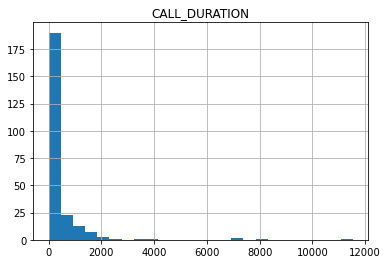

In [ ]:
df.hist(column="CALL_DURATION", bins=25)